In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mintpy
from mintpy.utils import readfile, utils as ut 
from mintpy.objects import timeseries
import cartopy.crs as ccrs
from mintpy import view
import datetime
from operator import itemgetter 
import h5py
import matplotlib.dates as mdates
from scipy import interpolate, stats
from miaplpy.find_short_baselines import get_baselines_dict
import matplotlib.colors as mcolors
from miaplpy.objects.invert_pixel import process_pixel 


def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp


def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]



def get_dates_ts(proj_dir, points_lalo, refy, refx, reftype, win_s=5, dir_res='L1_results', tsfile='timeseries.h5'):
    from mintpy.objects import timeseries   
  
    tsStack = proj_dir + '/{}/{}'.format(dir_res, tsfile)
    gStack = '/Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/geometryRadar.h5'
    atr = readfile.read_attribute(tsStack)
    coord = ut.coordinate(atr, gStack)
    stack_obj = timeseries(tsStack)
    stack_obj.open(print_msg=False)
    date_list = stack_obj.get_date_list()
    num_dates = len(date_list)
    
    ts = np.zeros([len(points_lalo), num_dates])
    
    for t, coord in enumerate(points_lalo):
    
        if reftype == 'lalo':
            dates, ts[t, :] = ut.read_timeseries_lalo(coord[0], coord[1], tsStack, lookup_file=gStack, 
                                                      ref_lat=refy, ref_lon=refx, win_size=win_s, unit='cm', 
                                                      print_msg=True)[0:2]
        if reftype =='yx':
            dates, ts[t, :] = ut.read_timeseries_yx(coord[0], coord[1], tsStack, ref_y=refy, ref_x=refx, 
                                                    win_size=win_s, unit='cm', print_msg=True)[0:2]
    
        
    x_values = [date.timetuple().tm_yday for date in dates]
    x = np.zeros([len(x_values),1])
    m = 0
    for t, value in enumerate(x_values):
        x[t] = value
        if t > 0: 
            if value < x[t-1]:
                if value < x_values[t-1]:
                    m += 360
                    x[t] += m
                else:
                    x[t] += m
                
    x = [y - x[0] for y in x]
    return dates, x, ts



center = 0
divnorm = mcolors.TwoSlopeNorm(vmin=0,vcenter=0.3, vmax=1)
hex_list = ['#7B0099','#DF2A8E','#ff7b25', '#ffcc5c', '#ffeead']
cmapc=get_continuous_cmap(hex_list)
normc=divnorm

In [3]:

points_lalo = np.array([(44.1053, -121.8506), 
                        (44.1481, -121.7866)]) 


# BEND station
reflat, reflon = 44.057, -121.315

prj_dir = '/Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large'

project_dirs = [prj_dir + '/single_reference/L1_results',
                prj_dir + '/delaunay_4/L1_results',
                prj_dir + '/delaunay_4/L2_results']

data = [x + '/geocoded_sub/geo_velocity.h5' for x in project_dirs]


geom_file = prj_dir + '/single_reference/geometryRadar.h5'


bbox = '43.96 44.35 -121.9764 -121.234'   # attr_b['mintpy.subset.lalo'].split(',')
lat = [float(i) for i in bbox.split()[0:2]]
lon = [float(i) for i in bbox.split()[2::]]

#baselines, dates = get_baselines_dict(prj_dir + '/inputs/baselines')
out_dir = './out_figures'

In [26]:


velfile = project_dirs[0] + '/velocity.h5'
!reference_point.py $velfile -l $reflat -L $reflon --lookup $geom_file
velfile = project_dirs[1] + '/velocity.h5'
!reference_point.py $velfile -l $reflat -L $reflon --lookup $geom_file
velfile = project_dirs[2] + '/velocity.h5'
!reference_point.py $velfile -l $reflat -L $reflon --lookup $geom_file
velfile = project_dirs[1] + '/vel2020.h5'
!reference_point.py $velfile -l $reflat -L $reflon --lookup $geom_file
velfile = project_dirs[2] + '/vel2020.h5'
!reference_point.py $velfile -l $reflat -L $reflon --lookup $geom_file


--------------------------------------------------
input reference point in lat/lon: (44.057, -121.315)
input reference point in y/x: (2394, 2100)
--------------------------------------------------
SAME reference pixel is already selected/saved in file, skip updating.
Done.
--------------------------------------------------
input reference point in lat/lon: (44.057, -121.315)
input reference point in y/x: (2394, 2100)
--------------------------------------------------
SAME reference pixel is already selected/saved in file, skip updating.
Done.
--------------------------------------------------
input reference point in lat/lon: (44.057, -121.315)
input reference point in y/x: (2394, 2100)
--------------------------------------------------
updating data value without re-writing to a new file
update metadata
Done.
--------------------------------------------------
input reference point in lat/lon: (44.057, -121.315)
input reference point in y/x: (2394, 2100)
------------------------------

In [27]:
geom_file = prj_dir + '/single_reference/geometryRadar.h5'
velfile = project_dirs[1] + '/vel2020.h5'
geocode_dir = project_dirs[1] + '/geocoded_sub'
!geocode.py $velfile -l $geom_file --outdir $geocode_dir --lalo 0.000185185 0.000185185 -b $bbox

velfile = project_dirs[2] + '/vel2020.h5'
geocode_dir = project_dirs[2] + '/geocoded_sub'
!geocode.py $velfile -l $geom_file --outdir $geocode_dir --lalo 0.000185185 0.000185185 -b $bbox

number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/geometryRadar.h5
output pixel size in (lat, lon) in degree: (-0.000185185, 0.000185185)
output area extent in (S, N, W, E) in degree: (43.960000390000005, 44.35, -121.9764, -121.233993335)
output file row / column number: (2106, 4009)
searching relevant box covering the current SNWE
--------------------------------------------------
resampling file: /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/delaunay_4/L1_results/vel2020.h5
update REF_LAT/LON/Y/X
--------------------------------------------------
grab dataset structure from ref_file: /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/delaunay_4/L1_results/vel2020.h5
create HDF5 file: /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/delaunay_4/L1_results/geocoded_sub/geo_vel2020.

In [28]:
geom_file = prj_dir + '/single_reference/geometryRadar.h5'

for prj in project_dirs:
    velfile = prj + '/velocity.h5'
    temp_coh = prj_dir + '/single_reference/temporalCoherence.h5'
    geocode_dir = prj + '/geocoded_sub'
    os.makedirs(geocode_dir, exist_ok=True)
    print(geom_file)
    #!geocode.py $geom_file --lookup $geom_file --outdir $geocode_dir --lalo 0.000185185 0.000185185 -b $bbox 
    !geocode.py $velfile -l $geom_file --outdir $geocode_dir --lalo 0.000185185 0.000185185 -b $bbox
    #!geocode.py $temp_coh -l $geom_file --outdir $geocode_dir --lalo 0.000185185 0.000185185 -b $bbox
    #!generate_mask.py $geocode_dir/geo_temporalCoherence.h5 -m .5 -o $geocode_dir/geo_maskTempCoh.h5

/Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/geometryRadar.h5
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/geometryRadar.h5
output pixel size in (lat, lon) in degree: (-0.000185185, 0.000185185)
output area extent in (S, N, W, E) in degree: (43.960000390000005, 44.35, -121.9764, -121.233993335)
output file row / column number: (2106, 4009)
searching relevant box covering the current SNWE
--------------------------------------------------
resampling file: /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/L1_results/velocity.h5
update REF_LAT/LON/Y/X
--------------------------------------------------
grab dataset structure from ref_file: /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/L1_results/velocity.h5
create HDF5 file:

In [4]:
def read_ds(proj_dir, velf='geo_velocity.h5'):
    velocity_file = proj_dir + '/geocoded_sub/{}'.format(velf)
    geometry_file = proj_dir + '/geocoded_sub/geo_geometryRadar.h5'
    mask_file_t = proj_dir + '/geocoded_sub/geo_maskTempCoh.h5'
    latitude = readfile.read(geometry_file, datasetName='latitude')[0]
    longitude = readfile.read(geometry_file, datasetName='longitude')[0]
    height = readfile.read(geometry_file, datasetName='height')[0]
    
    mask = np.ones(latitude.shape, dtype=np.int8)
    
    velocity = readfile.read(velocity_file, datasetName='velocity')[0]
    mask = readfile.read(mask_file_t, datasetName='mask')[0]
    vel = np.array(velocity[mask==1]*1000)
    lat = np.array(latitude[mask==1])
    lon = np.array(longitude[mask==1])
    
    return lat, lon, vel, height, latitude, longitude
    

In [30]:

latt, lonn, vel1_si, height, latitude, longitude = read_ds(project_dirs[0])
latt, lonn, vel1_de_l1, height, latitude, longitude = read_ds(project_dirs[1])
latt, lonn, vel1_de_l2, height, latitude, longitude = read_ds(project_dirs[2])
latt, lonn, vel1_de_l1_2020, height, latitude, longitude = read_ds(project_dirs[1], velf='geo_vel2020.h5')
latt, lonn, vel1_de_l2_2020, height, latitude, longitude = read_ds(project_dirs[2], velf='geo_vel2020.h5')

In [31]:
from scipy.ndimage.filters import gaussian_filter
X = gaussian_filter(longitude, 0.9)
Y = gaussian_filter(latitude, 0.9)
Z = gaussian_filter(height, 0.9)
dem_contour_sequence = np.arange(200, 9000, step=200)

view.py /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/L1_results/geocoded_sub/geo_velocity.h5 velocity --notitle --fontsize 18 --nocbar --alpha 0.001 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature --dem /Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem --contour-step 400 --contour-smooth 0.0 --shade-az -45 --scalebar 0.28 0.75 0.84 --scalebar-pad 0.05 --sub-lat 43.96 44.35 --sub-lon -121.9764 -121.234 --noverbose --notitle --ref-lalo 44.057 -121.315 -v -1 1
view.py /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/delaunay_4/L1_results/geocoded_sub/geo_velocity.h5 velocity --notitle --fontsize 18 --nocbar --alpha 0.001 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature --dem /Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem --contour-step 400 --contour-smooth 0.0 --shade-az -45 --scalebar 0.28 0.75 0.84 --scalebar-pad

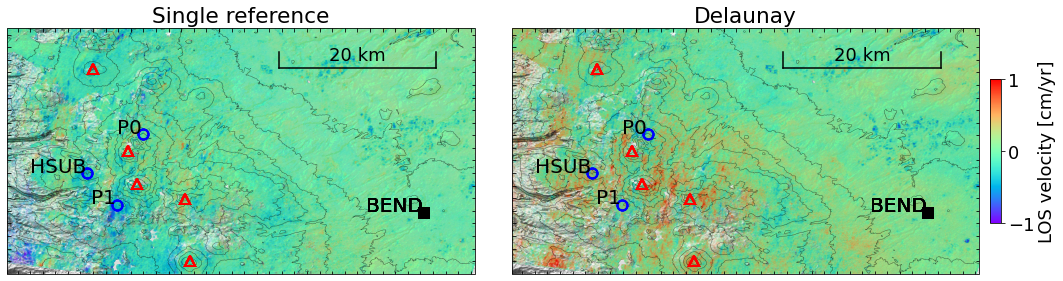

In [36]:
data = [x + '/geocoded_sub/geo_velocity.h5' for x in project_dirs]

dem_file = os.path.expanduser('/Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem')


points_lalo = np.array([(44.1545, -121.7848),
                        (44.1024, -121.7700),
                        (44.0787, -121.6942),
                        (44.2851, -121.8405),
                        (43.9798, -121.6866)])  #volcanoes

points_lalo1 = np.array([(44.1822, -121.7608), 
                        (44.0699, -121.8019),
                        (44.120, -121.849)]) 

labels = ['North sister', 'South sister', 'Broken top']
labels1 = ['P0', 'P1', 'HSUB']

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()
plt.rcParams["font.size"] = "18"

titles = ['Single reference', 'Delaunay']
#titles = ['Delaunay L1', 'Delaunay L2']

fsize = 12


factor = [3,2,2,2]
#titles = ['Ascending', 'Descending', 'Vertical', 'East-West']

# options for view.py

#opt =  ' --dem {}  --contour-step 200 --contour-smooth 0.0 --shade-az 45 '.format(dem_file)
#opt += ' --shade-exag 0.001 --shade-min -8000 --shade-max 4000 '
opt = ' --notitle --fontsize 18 --nocbar --alpha 0.001 '
opt += ' --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature'
opt += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az -45 '.format(dem_file)
opt += ' --scalebar 0.28 0.75 0.84 --scalebar-pad 0.05 '
opt += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
opt += ' --noverbose  --notitle --ref-lalo {} {}'.format(reflat, reflon)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

ff = 1

for t in range(2):
    ax = axs[t]
    ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

    cmd = 'view.py {} velocity'.format(data[t]) + opt 
    cmd += ' -v -{f} {f} '.format(f=ff)
    ax.set_title('Velocity', fontsize=fsize)
    d_v, atr, inps = view.prep_slice(cmd)
    im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]
    
    
    if t == 0:
        #ax.scatter(lonn, latt, c=vel1_si/10, cmap='rainbow',  vmin=-ff, vmax=ff,
        #           s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        ax.scatter(lonn, latt, c=vel1_si/10, cmap='rainbow',  vmin=-ff, vmax=ff,
                   s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        
    elif t == 1:
        im=ax.scatter(lonn, latt, c=vel1_de_l1/10, cmap='rainbow',  vmin=-ff, vmax=ff,
                   s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        
    ax.contour(X, Y, Z, dem_contour_sequence, colors='k', alpha=0.5, linewidths=0.5, transform=ccrs.PlateCarree())

        
    for x in range(points_lalo.shape[0]):
       
        #ax.text(points_lalo[x,1]-0.001, points_lalo[x,0]+0.002, labels[x], fontsize=20, 
        #        horizontalalignment='right', transform=ccrs.PlateCarree())
              
        ax.plot(points_lalo[:,1], points_lalo[:,0], '^', markersize=10, markerfacecolor=(0,0,0,0), 
                    markeredgecolor='r', markeredgewidth=2, transform=ccrs.PlateCarree())
        
        ax.plot(reflon, reflat, 's', markersize=10, markerfacecolor='k', 
                    markeredgecolor='k', markeredgewidth=2, transform=ccrs.PlateCarree())
        
        ax.text(reflon-0.002, reflat+0.002, 'BEND', fontsize=20, weight="normal",
                horizontalalignment='right', transform=ccrs.PlateCarree())
        
    for x in range(points_lalo1.shape[0]):
       
        ax.text(points_lalo1[x,1]-0.002, points_lalo1[x,0]+0.002, labels1[x], fontsize=20, 
                horizontalalignment='right', transform=ccrs.PlateCarree())
              
        ax.plot(points_lalo1[:,1], points_lalo1[:,0], 'o', markersize=10, markerfacecolor=(0,0,0,0), 
                    markeredgecolor='b', markeredgewidth=2, transform=ccrs.PlateCarree())
    ax.set_title(titles[t])
 

cbar_ax = fig.add_axes([0.96, 0.4, 0.01, 0.2])
fig.colorbar(im, cax=cbar_ax, ticks=[-ff,0,ff], label='LOS velocity [cm/yr]')
#fig.colorbar(im, cax=cbar_ax, label='Velocity (cm/yr)')

#cbar=fig.colorbar(im, ax=axs[4], ticks=[-3,0,3], label='cm/yr')
fig.subplots_adjust(wspace=0.08, hspace=-0.3, left=0.05, right=0.95, top=0.95, bottom=0.05)      


out_file = os.path.abspath(out_dir + '/velocity_Threesisters_si_del1.png')
#out_file = os.path.abspath(out_dir + '/velocity_Threesisters_deL1L2.png')
#out_file = os.path.abspath(out_dir + '/velocity_Threesisters_deL1L2_2020.png')

plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=300)
print('save figure to file', out_file)
plt.show()

view.py /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/L1_results/geocoded_sub/geo_velocity.h5 velocity --notitle --fontsize 18 --nocbar --alpha 0.001 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature --dem /Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem --contour-step 400 --contour-smooth 0.0 --shade-az -45 --scalebar 0.28 0.75 0.84 --scalebar-pad 0.05 --sub-lat 43.96 44.35 --sub-lon -121.9764 -121.234 --noverbose --notitle --ref-lalo 44.057 -121.315 -v -1 1
view.py /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/delaunay_4/L1_results/geocoded_sub/geo_velocity.h5 velocity --notitle --fontsize 18 --nocbar --alpha 0.001 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature --dem /Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem --contour-step 400 --contour-smooth 0.0 --shade-az -45 --scalebar 0.28 0.75 0.84 --scalebar-pad

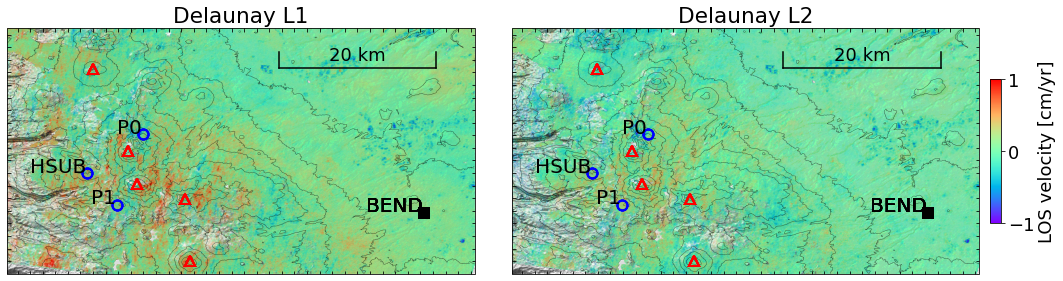

In [37]:
data = [x + '/geocoded_sub/geo_velocity.h5' for x in project_dirs]

dem_file = os.path.expanduser('/Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem')


points_lalo = np.array([(44.1545, -121.7848),
                        (44.1024, -121.7700),
                        (44.0787, -121.6942),
                        (44.2851, -121.8405),
                        (43.9798, -121.6866)])  #volcanoes

points_lalo1 = np.array([(44.1822, -121.7608), 
                        (44.0699, -121.8019),
                        (44.120, -121.849)]) 

labels = ['North sister', 'South sister', 'Broken top']
labels1 = ['P0', 'P1', 'HSUB']

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()
plt.rcParams["font.size"] = "18"

titles = ['Single reference', 'Delaunay']
titles = ['Delaunay L1', 'Delaunay L2']

fsize = 12


factor = [3,2,2,2]
#titles = ['Ascending', 'Descending', 'Vertical', 'East-West']

# options for view.py

#opt =  ' --dem {}  --contour-step 200 --contour-smooth 0.0 --shade-az 45 '.format(dem_file)
#opt += ' --shade-exag 0.001 --shade-min -8000 --shade-max 4000 '
opt = ' --notitle --fontsize 18 --nocbar --alpha 0.001 '
opt += ' --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature'
opt += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az -45 '.format(dem_file)
opt += ' --scalebar 0.28 0.75 0.84 --scalebar-pad 0.05 '
opt += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
opt += ' --noverbose  --notitle --ref-lalo {} {}'.format(reflat, reflon)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

ff = 1

for t in range(2):
    ax = axs[t]
    ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

    cmd = 'view.py {} velocity'.format(data[t]) + opt 
    cmd += ' -v -{f} {f} '.format(f=ff)
    ax.set_title('Velocity', fontsize=fsize)
    d_v, atr, inps = view.prep_slice(cmd)
    im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]
    
    
    if t == 0:
        #ax.scatter(lonn, latt, c=vel1_si/10, cmap='rainbow',  vmin=-ff, vmax=ff,
        #           s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        ax.scatter(lonn, latt, c=vel1_de_l1/10, cmap='rainbow',  vmin=-ff, vmax=ff,
                   s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        
    elif t == 1:
        im=ax.scatter(lonn, latt, c=vel1_de_l2/10, cmap='rainbow',  vmin=-ff, vmax=ff,
                   s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        
    ax.contour(X, Y, Z, dem_contour_sequence, colors='k', alpha=0.5, linewidths=0.5, transform=ccrs.PlateCarree())

        
    for x in range(points_lalo.shape[0]):
       
        #ax.text(points_lalo[x,1]-0.001, points_lalo[x,0]+0.002, labels[x], fontsize=20, 
        #        horizontalalignment='right', transform=ccrs.PlateCarree())
              
        ax.plot(points_lalo[:,1], points_lalo[:,0], '^', markersize=10, markerfacecolor=(0,0,0,0), 
                    markeredgecolor='r', markeredgewidth=2, transform=ccrs.PlateCarree())
        
        ax.plot(reflon, reflat, 's', markersize=10, markerfacecolor='k', 
                    markeredgecolor='k', markeredgewidth=2, transform=ccrs.PlateCarree())
        
        ax.text(reflon-0.002, reflat+0.002, 'BEND', fontsize=20, weight="normal",
                horizontalalignment='right', transform=ccrs.PlateCarree())
        
    for x in range(points_lalo1.shape[0]):
       
        ax.text(points_lalo1[x,1]-0.002, points_lalo1[x,0]+0.002, labels1[x], fontsize=20, 
                horizontalalignment='right', transform=ccrs.PlateCarree())
              
        ax.plot(points_lalo1[:,1], points_lalo1[:,0], 'o', markersize=10, markerfacecolor=(0,0,0,0), 
                    markeredgecolor='b', markeredgewidth=2, transform=ccrs.PlateCarree())
    ax.set_title(titles[t])
 

cbar_ax = fig.add_axes([0.96, 0.4, 0.01, 0.2])
fig.colorbar(im, cax=cbar_ax, ticks=[-ff,0,ff], label='LOS velocity [cm/yr]')
#fig.colorbar(im, cax=cbar_ax, label='Velocity (cm/yr)')

#cbar=fig.colorbar(im, ax=axs[4], ticks=[-3,0,3], label='cm/yr')
fig.subplots_adjust(wspace=0.08, hspace=-0.3, left=0.05, right=0.95, top=0.95, bottom=0.05)      


#out_file = os.path.abspath(out_dir + '/velocity_Threesisters_si_de.png')
out_file = os.path.abspath(out_dir + '/velocity_Threesisters_deL1L2.png')
#out_file = os.path.abspath(out_dir + '/velocity_Threesisters_deL1L2_2020.png')

plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=300)
print('save figure to file', out_file)
plt.show()

view.py /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/L1_results/geocoded_sub/geo_velocity.h5 velocity --notitle --fontsize 18 --nocbar --alpha 0.001 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature --dem /Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem --contour-step 400 --contour-smooth 0.0 --shade-az -45 --scalebar 0.28 0.75 0.84 --scalebar-pad 0.05 --sub-lat 43.96 44.35 --sub-lon -121.9764 -121.234 --noverbose --notitle --ref-lalo 44.057 -121.315 -v -1.2 1.2
view.py /Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/delaunay_4/L1_results/geocoded_sub/geo_velocity.h5 velocity --notitle --fontsize 18 --nocbar --alpha 0.001 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature --dem /Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem --contour-step 400 --contour-smooth 0.0 --shade-az -45 --scalebar 0.28 0.75 0.84 --scalebar

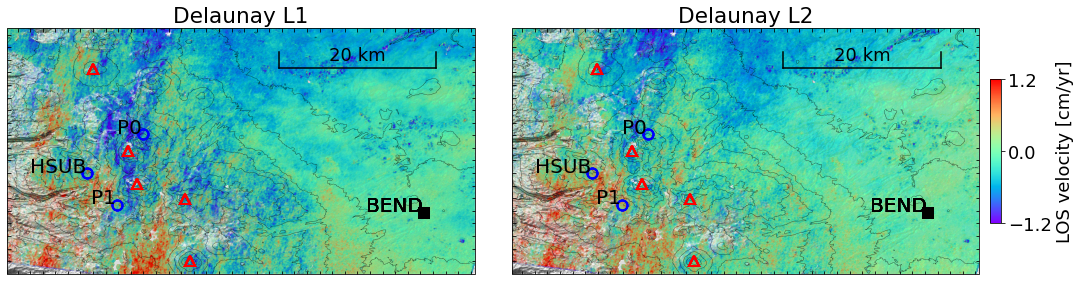

In [34]:
data = [x + '/geocoded_sub/geo_velocity.h5' for x in project_dirs]

dem_file = os.path.expanduser('/Volumes/SaraMNew/scratch/mintpy_subsets/ThreeSistersSenDT115/DEM/demLat_N43_N45_Lon_W124_W119.dem')


points_lalo = np.array([(44.1545, -121.7848),
                        (44.1024, -121.7700),
                        (44.0787, -121.6942),
                        (44.2851, -121.8405),
                        (43.9798, -121.6866)])  #volcanoes

points_lalo1 = np.array([(44.1822, -121.7608), 
                        (44.0699, -121.8019),
                        (44.120, -121.849)]) 

labels = ['North sister', 'South sister', 'Broken top']
labels1 = ['P0', 'P1', 'HSUB']

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()
plt.rcParams["font.size"] = "18"

titles = ['Single reference', 'Delaunay']
titles = ['Delaunay L1', 'Delaunay L2']

fsize = 12


factor = [3,2,2,2]
#titles = ['Ascending', 'Descending', 'Vertical', 'East-West']

# options for view.py

#opt =  ' --dem {}  --contour-step 200 --contour-smooth 0.0 --shade-az 45 '.format(dem_file)
#opt += ' --shade-exag 0.001 --shade-min -8000 --shade-max 4000 '
opt = ' --notitle --fontsize 18 --nocbar --alpha 0.001 '
opt += ' --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature'
opt += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az -45 '.format(dem_file)
opt += ' --scalebar 0.28 0.75 0.84 --scalebar-pad 0.05 '
opt += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
opt += ' --noverbose  --notitle --ref-lalo {} {}'.format(reflat, reflon)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

ff = 1.2

for t in range(2):
    ax = axs[t]
    ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

    cmd = 'view.py {} velocity'.format(data[t]) + opt 
    cmd += ' -v -{f} {f} '.format(f=ff)
    ax.set_title('Velocity', fontsize=fsize)
    d_v, atr, inps = view.prep_slice(cmd)
    im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]
    
    
    if t == 0:
        #ax.scatter(lonn, latt, c=vel1_si/10, cmap='rainbow',  vmin=-ff, vmax=ff,
        #           s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        ax.scatter(lonn, latt, c=vel1_de_l1_2020/10, cmap='rainbow',  vmin=-ff, vmax=ff,
                   s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        
    elif t == 1:
        im=ax.scatter(lonn, latt, c=vel1_de_l2_2020/10, cmap='rainbow',  vmin=-ff, vmax=ff,
                   s=0.001, marker='.', alpha=1, transform=ccrs.PlateCarree())
        
    ax.contour(X, Y, Z, dem_contour_sequence, colors='k', alpha=0.5, linewidths=0.5, transform=ccrs.PlateCarree())

        
    for x in range(points_lalo.shape[0]):
       
        #ax.text(points_lalo[x,1]-0.001, points_lalo[x,0]+0.002, labels[x], fontsize=20, 
        #        horizontalalignment='right', transform=ccrs.PlateCarree())
              
        ax.plot(points_lalo[:,1], points_lalo[:,0], '^', markersize=10, markerfacecolor=(0,0,0,0), 
                    markeredgecolor='r', markeredgewidth=2, transform=ccrs.PlateCarree())
        
        ax.plot(reflon, reflat, 's', markersize=10, markerfacecolor='k', 
                    markeredgecolor='k', markeredgewidth=2, transform=ccrs.PlateCarree())
        
        ax.text(reflon-0.002, reflat+0.002, 'BEND', fontsize=20, weight="normal",
                horizontalalignment='right', transform=ccrs.PlateCarree())
        
    for x in range(points_lalo1.shape[0]):
       
        ax.text(points_lalo1[x,1]-0.002, points_lalo1[x,0]+0.002, labels1[x], fontsize=20, 
                horizontalalignment='right', transform=ccrs.PlateCarree())
              
        ax.plot(points_lalo1[:,1], points_lalo1[:,0], 'o', markersize=10, markerfacecolor=(0,0,0,0), 
                    markeredgecolor='b', markeredgewidth=2, transform=ccrs.PlateCarree())
    ax.set_title(titles[t])
 

cbar_ax = fig.add_axes([0.96, 0.4, 0.01, 0.2])
fig.colorbar(im, cax=cbar_ax, ticks=[-ff,0,ff], label='LOS velocity [cm/yr]')
#fig.colorbar(im, cax=cbar_ax, label='Velocity (cm/yr)')

#cbar=fig.colorbar(im, ax=axs[4], ticks=[-3,0,3], label='cm/yr')
fig.subplots_adjust(wspace=0.08, hspace=-0.3, left=0.05, right=0.95, top=0.95, bottom=0.05)      


#out_file = os.path.abspath(out_dir + '/velocity_Threesisters_si_de.png')
#out_file = os.path.abspath(out_dir + '/velocity_Threesisters_deL1L2.png')
out_file = os.path.abspath(out_dir + '/velocity_Threesisters_deL1L2_2020.png')

plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=300)
print('save figure to file', out_file)
plt.show()

In [5]:
geom_file = prj_dir + '/single_reference/geometryRadar.h5'

tsStack_minopy = prj_dir + '/single_reference/L1_results/timeseries_ERA5_demErr.h5'
gStack_minopy = prj_dir + '/single_reference/geometryRadar.h5'
attr_minopy = readfile.read_attribute(tsStack_minopy)

## gps
lat_HUSB = 44.120
lon_HUSB = -121.849

lat_BEND = 44.057
lon_BEND = -121.315

coord_minopy = ut.coordinate(attr_minopy, gStack_minopy)
yg_husb, xg_husb = coord_minopy.geo2radar(lat_HUSB, lon_HUSB)[0:2]
incangle_husb = np.deg2rad(readfile.read(gStack_minopy, datasetName='incidenceAngle')[0][yg_husb, xg_husb])
azangle_husb = np.deg2rad(float(attr_minopy['HEADING'])) 


yg_bend, xg_bend = coord_minopy.geo2radar(lat_HUSB, lon_HUSB)[0:2]
incangle_bend = np.deg2rad(readfile.read(gStack_minopy, datasetName='incidenceAngle')[0][yg_bend, xg_bend])
azangle_bend = np.deg2rad(float(attr_minopy['HEADING'])) # np.deg2rad(-12.01849365234375)   #np.deg2rad(float(atr_EMI['HEADING']))


In [6]:
gps_file = './../DATA/GPS_data/HUSB.tenv3.txt'
file1 = open(gps_file,"r") 
lines_husb = file1.readlines()
file1.close()


indx = np.hstack([1, np.arange(6,13), np.arange(14,17)]).astype(int)
gps_points_husb = []
for t in lines_husb:
        A = t.split()
        gps_points_husb.append(itemgetter(*indx)(A))
        

gps_file = './../DATA/GPS_data/BEND.tenv3.txt'
file1 = open(gps_file,"r") 
lines_bend = file1.readlines()
file1.close()

indx = np.hstack([1, np.arange(6,13), np.arange(14,17)]).astype(int)
gps_points_bend = []
for t in lines_bend:
        A = t.split()
        gps_points_bend.append(itemgetter(*indx)(A))

        
xx_husb= [datetime.datetime.strptime(i[0], '%y%b%d') for i in gps_points_husb[1:]]
xx_bend = [datetime.datetime.strptime(i[0], '%y%b%d') for i in gps_points_bend[1:]]

first_date = datetime.datetime.strptime('18JAN01', '%y%b%d')
first_date = datetime.datetime.strptime('19Jan01', '%y%b%d')

ind_h = np.min(np.where((np.array(xx_husb)-first_date)>datetime.timedelta(days=0))[0])
ind_b = np.min(np.where((np.array(xx_bend)-first_date)>datetime.timedelta(days=0))[0])
print(ind_h, ind_b)

xx_husb = xx_husb[ind_h::]
xx_bend = xx_bend[ind_b::]
gps_points_husb = gps_points_husb[ind_h:]
gps_points_bend = gps_points_bend[ind_b:]

m1, m2 = np.min(xx_husb), np.max(xx_husb)
h1,h2 = np.min(xx_bend), np.max(xx_bend)

val = np.max([m1,h1])
ind1_husb = xx_husb.index(val)
ind1_bend = xx_bend.index(val)

val = np.min([m2,h2])
ind2_husb = xx_husb.index(val)
ind2_bend = xx_bend.index(val)

xx_husb = xx_husb[ind1_husb:ind2_husb]
xx_bend = xx_bend[ind1_bend:ind2_bend]

xx_husb_d = [(x-xx_husb[0]).days for x in xx_husb]
xx_bend_d = [(x-xx_husb[0]).days for x in xx_bend]


E_husb = np.array([float(i[3])*100 for i in gps_points_husb[1:]])[ind1_husb:ind2_husb]
N_husb = np.array([float(i[5])*100 for i in gps_points_husb[1:]])[ind1_husb:ind2_husb]
U_husb = np.array([float(i[7])*100 for i in gps_points_husb[1:]])[ind1_husb:ind2_husb]
dlos_husb = (N_husb*np.sin(azangle_husb) - E_husb*np.cos(azangle_husb))*np.sin(incangle_husb) + U_husb*np.cos(incangle_husb)
#dlos_mintpy_husb = (N*np.sin(azangle_mintpy) - E*np.cos(azangle_mintpy))*np.sin(incangle_mintpy) + U*np.cos(incangle_mintpy)


E_bend = np.array([float(i[3])*100 for i in gps_points_bend[1:]])[ind1_bend:ind2_bend]
N_bend = np.array([float(i[5])*100 for i in gps_points_bend[1:]])[ind1_bend:ind2_bend]
U_bend = np.array([float(i[7])*100 for i in gps_points_bend[1:]])[ind1_bend:ind2_bend]
dlos_bend = (N_bend*np.sin(azangle_bend) - E_bend*np.cos(azangle_bend))*np.sin(incangle_bend) + U_bend*np.cos(incangle_bend)


f = interpolate.interp1d(xx_bend_d, dlos_bend)
dlos_husb_intp = f(xx_husb_d)


5246 4639


In [44]:
project_dirs

['/Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/single_reference/L1_results',
 '/Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/delaunay_4/L1_results',
 '/Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115/large/delaunay_4/L2_results']

In [7]:
# BEND station
reflat, reflon = 44.057, -121.315
reflat, reflon = 44.0573, -121.3153
#reflat, reflon = 44.0569, -121.3151
points_lalo1 = np.array([(44.1822, -121.7608), 
                        (44.0699, -121.8019),
                        (44.120, -121.849)]) 


project_dirs2 = [x.split('/L')[0] for x in project_dirs]

tsss = 'timeseries_ERA5_demErr.h5'
#tsss = 'timeseries.h5'

dates_sr, x_sr, ts_sr_l2 = get_dates_ts(project_dirs2[0], points_lalo1, 
                                        reflat, reflon, 'lalo', dir_res='L2_results',tsfile=tsss)  # single reference

dates_de, x_de, ts_de_l2 = get_dates_ts(project_dirs2[1], points_lalo1, 
                                        reflat, reflon, 'lalo', dir_res='L2_results',tsfile=tsss)  # delaunay

dates_sr, x_sr, ts_sr_l1 = get_dates_ts(project_dirs2[0], points_lalo1, 
                                        reflat, reflon, 'lalo', dir_res='L1_results',tsfile=tsss)  # single reference
dates_de, x_de, ts_de_l1 = get_dates_ts(project_dirs2[1], points_lalo1, 
                                        reflat, reflon, 'lalo', dir_res='L1_results',tsfile=tsss)  # delaunay


input lat / lon: 44.1822 / -121.7608
corresponding y / x: 1852 / 11758
input lat / lon: 44.0699 / -121.8019
corresponding y / x: 2777 / 12127
input lat / lon: 44.12 / -121.849
corresponding y / x: 2432 / 13400
input lat / lon: 44.1822 / -121.7608
corresponding y / x: 1852 / 11758
input lat / lon: 44.0699 / -121.8019
corresponding y / x: 2777 / 12127
input lat / lon: 44.12 / -121.849
corresponding y / x: 2432 / 13400
input lat / lon: 44.1822 / -121.7608
corresponding y / x: 1852 / 11758
input lat / lon: 44.0699 / -121.8019
corresponding y / x: 2777 / 12127
input lat / lon: 44.12 / -121.849
corresponding y / x: 2432 / 13400
input lat / lon: 44.1822 / -121.7608
corresponding y / x: 1852 / 11758
input lat / lon: 44.0699 / -121.8019
corresponding y / x: 2777 / 12127
input lat / lon: 44.12 / -121.849
corresponding y / x: 2432 / 13400


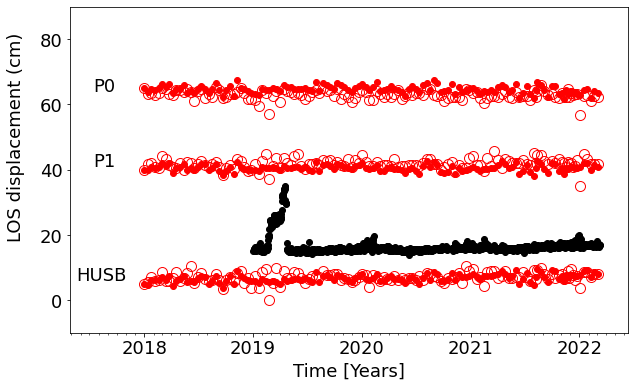

In [31]:
plt.rcParams["font.size"] = "18"
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()

colors = ['lightcoral', 'darkviolet','aquamarine','springgreen','forestgreen','darkgreen']

shifts = [0,2,4]
lsh = np.array([[0,10,4],
                [0,10,4],
               [0,5,2]])

shifts = [0,2,6]
lsh = np.array([[4,15,0],
                [4,15,0],
               [2,5,0]])



fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

msize = 15
fsize=8

shift = [0, 40, 70]
shift = [50, 25, 0]
#shift = [0, 20, 40]


labels = ['GPS','Delaunay L1',  'Delaunay L2','Single reference L1','Single reference L2' ] #, 'Sequential(2 conn)+Annual']
labels = ['GNSS','Delaunay L1',  'Delaunay L2','Single reference' ] #, 'Sequential(2 conn)+Annual']

ax1 = axs
#ax2 = ax1.twinx()

#bslines = np.array([baselines[x] for x in np.sort(dates)])
ax1.plot(xx_husb, dlos_husb - dlos_husb_intp - (dlos_husb - dlos_husb_intp)[0]+shift[2]+15, 'o', color='black')

for t in range(len(points_lalo1)):
        
    ax1.plot(dates_de, ts_de_l1[t, :] - ts_de_l1[t, 0] + lsh[t, 1]+ shift[t], 'ro',markersize=6,  linewidth=1)   
    ax1.plot(dates_de, ts_de_l2[t, :] - ts_de_l2[t, 0] + lsh[t, 1]+ shift[t], 'ro',markersize=10,  
             markerfacecolor=(0,0,0,0), markeredgecolor='red', linewidth=1)
    
    #ax1.plot(dates_sr, ts_sr_l1[t, :] - ts_sr_l1[t, 0] + lsh[t, 0]+ shift[t], 'go',markersize=6,  linewidth=1)   
    #ax1.plot(dates_sr, ts_sr_l2[t, :] - ts_sr_l2[t, 0] + lsh[t, 0]+ shift[t], 'g*',markersize=10, 
    #         markerfacecolor=(0,0,0,0), markeredgecolor='green', linewidth=1)    
    
    #ax1.plot(dates_se, ts_se[t, :] - ts_se[t, 0] + shifts[3]+ shift[t], 'mo',markersize=6,  linewidth=1)
        
    #ax2.plot(dates_sr, bslines, 'bo-', markersize=6)
    '''
    
    ax1.text(dates_sr[-1] + datetime.timedelta(days=20), 
             ts_sr[t, -1] - ts_sr[t, 0] + lsh[t,0]+ shift[t], 
             labels[1], color='y')
    
    ax1.text(dates_de[-1] + datetime.timedelta(days=20), 
             ts_de[t, -1] - ts_de[t, 0] + lsh[t,1]+ shift[t], 
             labels[2], color='r')
    
    '''

    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(years_fmt)
    ax1.xaxis.set_minor_locator(months)
    ax1.autoscale_view()



ax1.text(dates_de[0]-datetime.timedelta(days=170) , ts_de_l1[0, 0] + shifts[2]+shift[0]+8, 'P0')
ax1.text(dates_de[0]-datetime.timedelta(days=170) , ts_de_l1[1, 0] + shifts[2]+shift[1]+10, 'P1')
ax1.text(dates_de[0]-datetime.timedelta(days=230) , ts_de_l1[2, 0] + shifts[2]+shift[2], 'HUSB')
#ax1.text(dates_se[-1]+datetime.timedelta(days=20) , (ts_sr[t, -1] - (ts_de[t, -1]))*4*np.pi/56 + shift[2]-1, 'P2', size=20)

ax1.set_xlim(dates_sr[0]-datetime.timedelta(days=250), dates_sr[-1]+datetime.timedelta(days=100))
#ax1.legend(labels, loc='lower right', bbox_to_anchor=(1.55,0.5))

#ax2.set_ylim(-60, 520)
ax1.set_ylim(-10, 90)
#ax1.set_ylim(-10, 80)
#ax2.set_ylabel('Perp baseline \n(m)', color='blue')
#ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_ylabel('LOS displacement (cm)')

ax1.set_xlabel('Time [Years]')

#ax2.set_yticks((-50, 0, 50, 100))
#ax1.set_yticks((0, 100, 200, 300, 400))
ax1.set_xticks((datetime.datetime(2018, 1, 1, 0, 0), 
                datetime.datetime(2019, 1, 1, 0, 0),
               datetime.datetime(2020, 1, 1, 0, 0),
               datetime.datetime(2021, 1, 1, 0, 0),
               datetime.datetime(2022, 1, 1, 0, 0)))
ax1.yaxis.set_label_coords(-0.08, 0.6)
#ax2.yaxis.set_label_coords(1.08, 0.18)

plt.savefig(out_dir + '/Threesisters_timeseries_L1L2_no_correction_noinversion3.png', bbox_inches='tight', transparent=True, dpi=300)

plt.show()


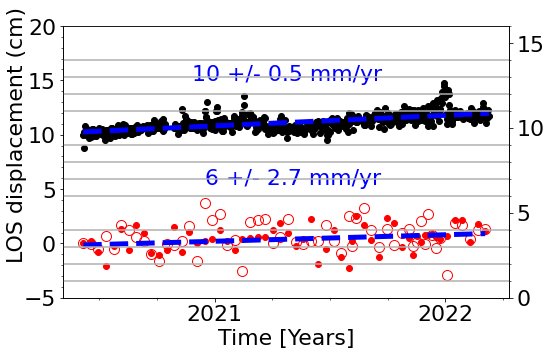

In [21]:
plt.rcParams["font.size"] = "22"
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()

colors = ['lightcoral', 'darkviolet','aquamarine','springgreen','forestgreen','darkgreen']

shifts = [0,2,4]
lsh = np.array([[0,10,4],
                [0,10,4],
               [0,0,2]])


ind_j20 = list(dates_de).index(datetime.datetime(2020, 6, 7, 0, 0))
ind_gps = list(xx_husb).index(datetime.datetime(2020, 6, 7, 0, 0))


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

msize = 15
fsize=8

shift = [0, 30, 70]
#shift = [0, 20, 40]


labels = ['GNSS','Delaunay L1',  'Delaunay L2','Single reference' ] #, 'Sequential(2 conn)+Annual']

ax1 = axs
#ax2 = ax1.twinx()

#bslines = np.array([baselines[x] for x in np.sort(dates)])
ax1.plot(xx_husb[ind_gps:], dlos_husb[ind_gps:] - dlos_husb_intp[ind_gps:] - (dlos_husb[ind_gps] - dlos_husb_intp[ind_gps])+10, 'o', color='black')

#for t in range(len(points_lalo1)):
    
t=2
        
ax1.plot(dates_de[ind_j20:], ts_de_l1[t, ind_j20:] - ts_de_l1[t, ind_j20] + lsh[t, 1], 'ro',markersize=6,  linewidth=1)   
ax1.plot(dates_de[ind_j20:], ts_de_l2[t, ind_j20:] - ts_de_l2[t, ind_j20] + lsh[t, 1], 'ro',markersize=10,  
        markerfacecolor=(0,0,0,0), markeredgecolor='red', linewidth=1)
#ax1.plot(dates_sr[ind_j20:], ts_sr_l2[t, ind_j20:] - ts_sr_l2[t, ind_j20] + lsh[t, 0], 'g*',markersize=10, 
#         markerfacecolor=(0,0,0,0), markeredgecolor='green', linewidth=1)    
    

x_reg_de_l1 = np.array([(x-dates_de[ind_j20]).days for x in dates_de[ind_j20:]]).flatten()
res_de_l1 = stats.linregress(x_reg_de_l1, ts_de_l1[t, ind_j20:] - ts_de_l1[t, ind_j20] + lsh[t, 1])
ax1.plot(dates_de[ind_j20:], res_de_l1.intercept + res_de_l1.slope * np.array(x_reg_de_l1), '--', color='b', linewidth=5)
ax1.text(dates_de[90], ts_de_l1[t, 50] - ts_de_l1[t, ind_j20] + lsh[t, 1]+5,'{:.0f} +/- {:.1f} mm/yr'.format(res_de_l1.slope*3652.5, res_de_l1.stderr*3652.5), color='b')


x_reg_g = np.array([(x-xx_husb[ind_gps]).days for x in xx_husb[ind_gps:]]).flatten()
res_g = stats.linregress(x_reg_g, dlos_husb[ind_gps:] - dlos_husb_intp[ind_gps:] - (dlos_husb[ind_gps] - dlos_husb_intp[ind_gps])+10)
ax1.plot(xx_husb[ind_gps:], res_g.intercept + res_g.slope * np.array(x_reg_g), '--', color='b', linewidth=5)
ax1.text(xx_husb[ind_gps+150], dlos_husb[ind_gps+150] - dlos_husb_intp[ind_gps] - (dlos_husb[ind_gps] - dlos_husb_intp[ind_gps])+15,'{:.0f} +/- {:.1f} mm/yr'.format(res_g.slope*3652.5, res_g.stderr*3652.5), color='b')



ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.autoscale_view()



#ax1.text(dates_sr[0]-datetime.timedelta(days=170) , ts_sr_l1[0, 0] + shifts[2]+shift[0], 'P0')
#ax1.text(dates_sr[0]-datetime.timedelta(days=170) , ts_sr_l1[1, 0] + shifts[2]+shift[1], 'P1')
#ax1.text(dates_sr[0]-datetime.timedelta(days=230) , ts_sr_l1[2, 0] + shifts[2]+shift[2], 'HUSB')
#ax1.text(dates_se[-1]+datetime.timedelta(days=20) , (ts_sr[t, -1] - (ts_de[t, -1]))*4*np.pi/56 + shift[2]-1, 'P2', size=20)

#ax1.set_xlim(dates_sr[ind_j20]-datetime.timedelta(days=250), dates_sr[-1]+datetime.timedelta(days=400))
#ax1.legend(labels, loc='lower right', bbox_to_anchor=(1.55,0.5))

#ax2.set_ylim(-60, 520)
#ax1.set_ylim(-10, 100)
#ax1.set_ylim(-10, 80)
#ax2.set_ylabel('Perp baseline \n(m)', color='blue')
#ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_ylabel('LOS displacement (cm)')

ax1.set_xlabel('Time [Years]')

#ax2.set_yticks((-50, 0, 50, 100))
#ax1.set_yticks((0, 100, 200, 300, 400))
ax1.set_xticks((datetime.datetime(2021, 1, 1, 0, 0),
               datetime.datetime(2022, 1, 1, 0, 0)))
ax1.yaxis.set_label_coords(-0.08, 0.6)
#ax2.yaxis.set_label_coords(1.08, 0.18)
ax1.yaxis.get_ticklocs(minor=True)     # []
ax1.minorticks_on()
ax2 = ax1.twinx()
ax2.yaxis.get_ticklocs(minor=True)     # []
ax2.minorticks_on()

ax1.set_ylim(-5, 20)
ax2.set_ylim(0, 16)
plt.gca().yaxis.grid(True, which='minor', linewidth=1.5)
#plt.savefig(out_dir + '/zoom_in_Threesisters_timeseries.png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig(out_dir + '/zoom_in_Threesisters_timeseries2.png', bbox_inches='tight', transparent=True, dpi=300)

plt.show()

In [88]:
# BEND station
reflat, reflon = 44.057, -121.315
reflat, reflon = 44.0573, -121.3153
#reflat, reflon = 44.0569, -121.3151
points_lalo1 = np.array([(44.1822, -121.7608), 
                        (44.0699, -121.8019),
                        (44.120, -121.849)]) 



dates_sr, x_sr, cts_sr_l2 = get_dates_ts(project_dirs[0], points_lalo1, 
                                        reflat, reflon, 'lalo', dir_res='L2_results',tsfile='timeseries_ERA5_demErr.h5')  # single reference

dates_de, x_de, cts_de_l2 = get_dates_ts(project_dirs[1], points_lalo1, 
                                        reflat, reflon, 'lalo', dir_res='L2_results',tsfile='timeseries_ERA5_demErr.h5')  # delaunay

dates_sr, x_sr, cts_sr_l1 = get_dates_ts(project_dirs[0], points_lalo1, 
                                        reflat, reflon, 'lalo', dir_res='L1_results',tsfile='timeseries_ERA5_demErr.h5')  # single reference
dates_de, x_de, cts_de_l1 = get_dates_ts(project_dirs[1], points_lalo1, 
                                        reflat, reflon, 'lalo', dir_res='L1_results',tsfile='timeseries_ERA5_demErr.h5')  # delaunay


input lat / lon: 44.1822 / -121.7608
corresponding y / x: 1852 / 11758
input lat / lon: 44.0699 / -121.8019
corresponding y / x: 2777 / 12127
input lat / lon: 44.12 / -121.849
corresponding y / x: 2432 / 13400
input lat / lon: 44.1822 / -121.7608
corresponding y / x: 1852 / 11758
input lat / lon: 44.0699 / -121.8019
corresponding y / x: 2777 / 12127
input lat / lon: 44.12 / -121.849
corresponding y / x: 2432 / 13400
input lat / lon: 44.1822 / -121.7608
corresponding y / x: 1852 / 11758
input lat / lon: 44.0699 / -121.8019
corresponding y / x: 2777 / 12127
input lat / lon: 44.12 / -121.849
corresponding y / x: 2432 / 13400
input lat / lon: 44.1822 / -121.7608
corresponding y / x: 1852 / 11758
input lat / lon: 44.0699 / -121.8019
corresponding y / x: 2777 / 12127
input lat / lon: 44.12 / -121.849
corresponding y / x: 2432 / 13400


In [132]:
prj_old = '/Volumes/SaraMNew/scratch/minopy_subsets/ThreeSistersSenDT115'
tsStack_minopy = prj_old + '/single_reference/timeseries.h5'
gStack_minopy = prj_old + '/single_reference/geometryRadar.h5'
slc_stack = prj_old + '/slcStack.h5'

points_lalo1 = np.array([(44.1822, -121.7608), 
                        (44.0699, -121.8019),
                        (44.120, -121.849)]) 

attr_minopy = readfile.read_attribute(tsStack_minopy)

coord_minopy = ut.coordinate(attr_minopy, gStack_minopy)

# P0
yg_minopy1, xg_minopy1 = coord_minopy.geo2radar(points_lalo1[0][0], points_lalo1[0][1])[0:2]
vec_refined_1, temp_quality_1, coh_mat_1, shp_1, amp_1, data_1, col0_1, row0_1 = process_pixel((yg_minopy1, xg_minopy1), slc_stack)

# P1
yg_minopy2, xg_minopy2 = coord_minopy.geo2radar(points_lalo1[1][0], points_lalo1[1][1])[0:2]
vec_refined_2, temp_quality_2, coh_mat_2, shp_2, amp_2, data_2, col0_2, row0_2 = process_pixel((yg_minopy2, xg_minopy2), slc_stack)

# HUSB
yg_minopy3, xg_minopy3 = coord_minopy.geo2radar(points_lalo1[2][0], points_lalo1[2][1])[0:2]
vec_refined_3, temp_quality_3, coh_mat_3, shp_3, amp_3, data_3, col0_3, row0_3 = process_pixel((yg_minopy3, xg_minopy3), slc_stack)




(100, 100)
0.5565361311127405
(100, 100)
0.493823417632993
(100, 100)
0.3154297880428965


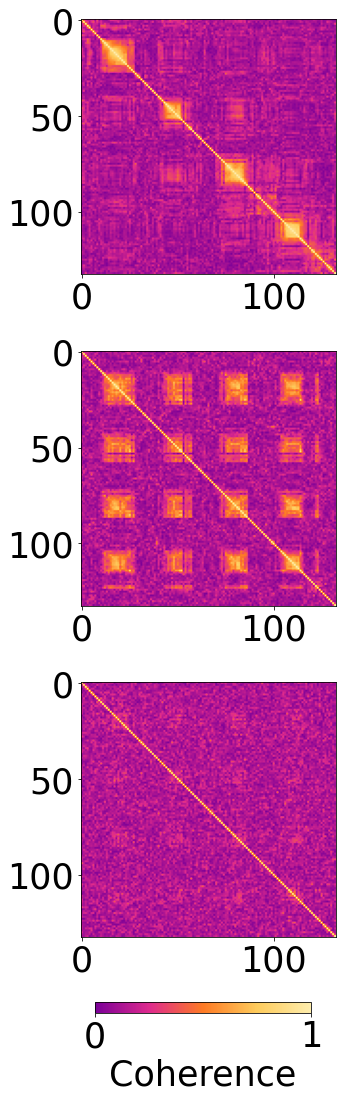

In [133]:
plt.rcParams["font.size"] = "35"
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

ax = axs[0]
im=ax.imshow(np.abs(np.array(coh_mat_1)), vmin=0, vmax=1, cmap=cmapc)
ax = axs[1]
ax.imshow(np.abs(np.array(coh_mat_2)), vmin=0, vmax=1, cmap=cmapc)
ax = axs[2]
ax.imshow(np.abs(np.array(coh_mat_3)), vmin=0, vmax=1, cmap=cmapc)


cbar_ax2 = fig.add_axes([0.42, 0.03, 0.2, 0.01])
#cbar_ax2 = fig.add_axes([0.5, 0.01, 0.005, 0.15, ])
fig.colorbar(im, cax=cbar_ax2, ticks=[0, 1], label='Coherence', orientation='horizontal')
fig.subplots_adjust(wspace=0.1, hspace=0.3, left=0.1, right=0.95, top=0.95, bottom=0.1)      

plt.savefig(out_dir + '/Threesisters_timeseries_unwrap_compare_coh_matrix.png', bbox_inches='tight', transparent=True, dpi=300)

plt.savefig(out_dir + '/Threesisters_timeseries_unwrap_compare_coh_matrix.eps', bbox_inches='tight', transparent=True, dpi=300)


